In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'massive-yahoo-finance-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4081618%2F7084494%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240415%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240415T005022Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dd1b1e09f7ba83e307275714f2794e1a36c26665aaadf66c7a9a00895761d1baa9d170ca1c355107d365657efd1fe0469298fa73441259a4fb6a152932acb3ac86c311b14f8e1e51f0327a058a31a30c71f8a3b952d42b787fdf05a09ba231b62efe9533fdfc31412caf9d4f0081f2189123fd3e917ad39a1f479398b55507c91bb9a55c91bc77bc80a1673486ea768bdd1a177ccba9613a55440bfd8a51629e60c316848a696bac7fec178220acca53ec027103aa9c946e4a54c8d0c318a78879d2ac645a0c3e25f2403c709c2dd79b7f985758f892bbb8aa9caa3a9dac761753c7e1b3d5107a8b4dbd9e8679229b2e9f48711880ab05fb3b45782c372bc83bb'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 23885678 bytes downloaded
Downloaded and uncompressed: massive-yahoo-finance-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data = pd.read_csv("/kaggle/input/massive-yahoo-finance-dataset/stock_details_5_years.csv")
data

/kaggle/input/massive-yahoo-finance-dataset/stock_details_5_years.csv


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA
...,...,...,...,...,...,...,...,...,...
602957,2023-11-29 00:00:00-05:00,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,PPL
602958,2023-11-29 00:00:00-05:00,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,FITB
602959,2023-11-29 00:00:00-05:00,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,IFF
602960,2023-11-29 00:00:00-05:00,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,CCJ


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print("Basic Information:")
print(data.info())



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          602962 non-null  object 
 1   Open          602962 non-null  float64
 2   High          602962 non-null  float64
 3   Low           602962 non-null  float64
 4   Close         602962 non-null  float64
 5   Volume        602962 non-null  int64  
 6   Dividends     602962 non-null  float64
 7   Stock Splits  602962 non-null  float64
 8   Company       602962 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 41.4+ MB
None


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())




Missing Values:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Company         0
dtype: int64


In [ ]:
# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())




Summary Statistics:
                Open           High            Low          Close  \
count  602962.000000  602962.000000  602962.000000  602962.000000   
mean      140.074711     141.853492     138.276316     140.095204   
std       275.401725     279.003191     271.895276     275.477969   
min         1.052425       1.061195       1.026114       1.034884   
25%        39.566159      40.056222      39.058151      39.563746   
50%        79.177964      80.125563      78.193820      79.177906   
75%       157.837190     159.746317     155.841609     157.847153   
max      6490.259766    6525.000000    6405.000000    6509.350098   

             Volume     Dividends   Stock Splits  
count  6.029620e+05  602962.00000  602962.000000  
mean   5.895601e+06       0.00731       0.000344  
std    1.381596e+07       0.12057       0.050607  
min    0.000000e+00       0.00000       0.000000  
25%    1.031500e+06       0.00000       0.000000  
50%    2.228700e+06       0.00000       0.000000  


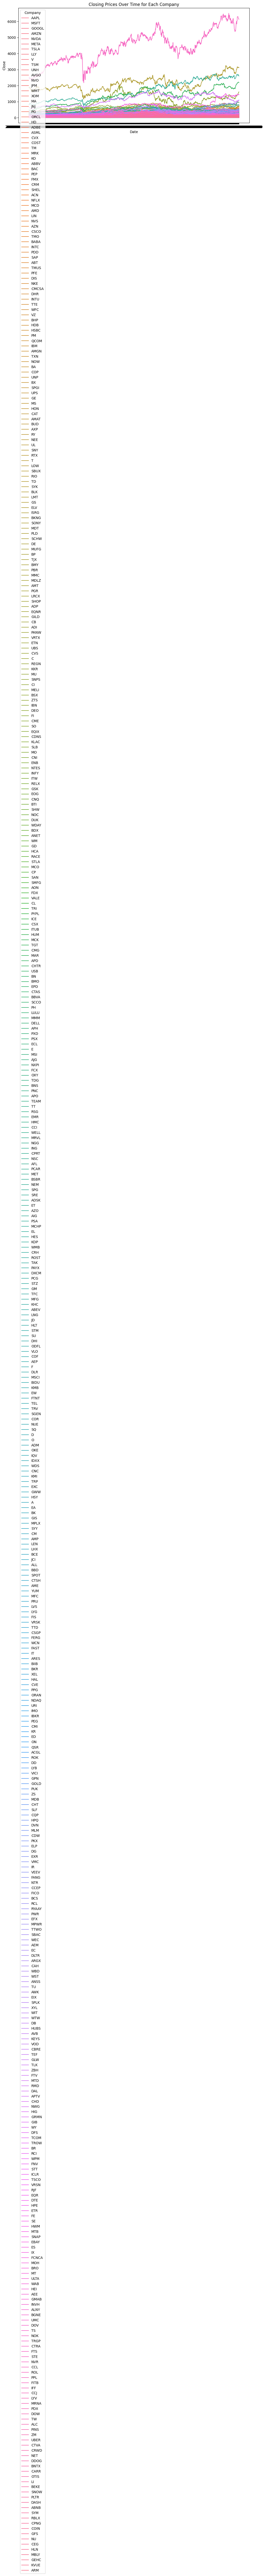

In [ ]:
# Time series analysis - Plotting closing prices over time for each company
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', hue='Company', data=data)
plt.title('Closing Prices Over Time for Each Company')
plt.show()


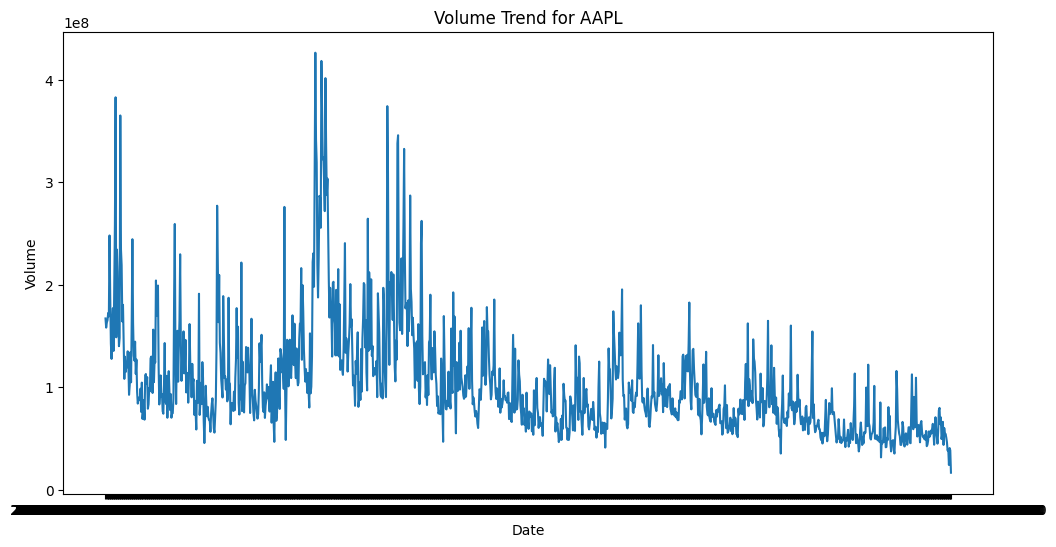

In [ ]:
# Volume analysis for a specific company (e.g., AAPL)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Volume', data=data[data['Company'] == 'AAPL'])
plt.title('Volume Trend for AAPL')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 读取数据
data = pd.read_csv("/kaggle/input/massive-yahoo-finance-dataset/stock_details_5_years.csv")

# 将 'Date' 列转换为日期时间类型
data['Date'] = pd.to_datetime(data['Date'], utc=True).dt.tz_localize(None)

# 提取唯一的公司列表
companies = data['Company'].unique()

# 创建一个字典来存储评估指标
evaluations = {}

for company in companies:
    # 过滤当前公司的数据
    company_data = data[data['Company'] == company]
    # 特征和目标变量
    features = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits']
    x = company_data[features]
    y = company_data['Close']
    # 将数据拆分为训练集和测试集
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    # 创建并训练模型
    model = RandomForestRegressor(n_estimators=20, random_state=42)
    model.fit(x_train, y_train)
    # 进行预测
    predictions = model.predict(x_test)
    # 评估模型
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    # 存储评估指标
    evaluations[company] = {'Mean squared Error': mse, 'R-squared': r2}

# 打印输出
for company, metrics in evaluations.items():
    print(f"{company}:\nMean squared Error: {metrics['Mean squared Error']}\nR-squared: {metrics['R-squared']}\n")


AAPL:
Mean squared Error: 1.2086229309281924
R-squared: 0.9994578928041383

MSFT:
Mean squared Error: 5.412077345218548
R-squared: 0.9989916190294904

GOOGL:
Mean squared Error: 0.7199681500988493
R-squared: 0.9991765381356859

AMZN:
Mean squared Error: 1.9222451046075608
R-squared: 0.9980355126604391

NVDA:
Mean squared Error: 13.488033408174191
R-squared: 0.999026767773057

META:
Mean squared Error: 6.773708604814711
R-squared: 0.9984601645531117

TSLA:
Mean squared Error: 14.349470895900819
R-squared: 0.9988488468975932

LLY:
Mean squared Error: 7.745889166929179
R-squared: 0.9995295523335097

V:
Mean squared Error: 2.671694367442431
R-squared: 0.9966323738178877

TSM:
Mean squared Error: 0.6285637424101032
R-squared: 0.9992394039897772

UNH:
Mean squared Error: 12.487344533268264
R-squared: 0.9989888483632697

AVGO:
Mean squared Error: 22.95381850565497
R-squared: 0.999355579772297

NVO:
Mean squared Error: 0.10349309868231496
R-squared: 0.9997754013861299

JPM:
Mean squared Error:

In [ ]:
user_company = input("Enter the company name:")
user_date = input("Enter the date (YYYY-MM-DD):")

# 假设您从输入中获取了这些值，如果不是，根据您的数据或输入修改这些值
open_price = 100.0
high_price = 110.0
low_price = 90.0
volume = 1000000
dividends = 0.5
Stock_Splits = 0.0
# 预测输入特征的收盘价
new_data = [[open_price, high_price, low_price, volume, dividends, Stock_Splits]]
predicted_close = model.predict(new_data)
print('Predicted close price for {} on {}: {:.2f}'.format(user_company, user_date, predicted_close[0]))

# 评估模型
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)


Enter the company name: AAPL
Enter the date (YYYY-MM-DD): 2023-04-15


Predicted close price for AAPL on 2023-04-15: 93.87
Mean Squared Error: 0.5654471855100245
R-squared: 0.9664791669435105


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVR

# 读取数据
data = pd.read_csv("/kaggle/input/massive-yahoo-finance-dataset/stock_details_5_years.csv")

# 数据清理
# 删除包含缺失值的行
data.dropna(inplace=True)

# 数据预处理
# 分割数据为特征和目标变量
X = data[['Open', 'High', 'Low', 'Volume']]  # 特征
y = data['Close']  # 目标变量

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征缩放（标准化）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 训练支持向量回归模型
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)

# 预测
y_pred_svr = svr_model.predict(X_test_scaled)

# 模型评估
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("支持向量回归模型均方误差 (MSE):", mse_svr)
print("支持向量回归模型R^2 分数:", r2_svr)

# 将目标变量转换为分类变量
y_train_class = pd.cut(y_train, bins=3, labels=[0, 1, 2])
y_test_class = pd.cut(y_test, bins=3, labels=[0, 1, 2])

# 训练支持向量分类模型
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_scaled, y_train_class)

# 预测
y_pred_class = svc_model.predict(X_test_scaled)

# 计算准确率和F1分数
accuracy_class = accuracy_score(y_test_class, y_pred_class)
f1_class = f1_score(y_test_class, y_pred_class, average='weighted')

print("准确率:", accuracy_class)
print("F1 分数:", f1_class)

# 打印分类报告
print("分类报告:")
print(classification_report(y_test_class, y_pred_class))

# 计算并打印混淆矩阵
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print("混淆矩阵:")
print(conf_matrix)
